# Guided Example: Spam Classification with Naïve Bayes

This example will go through a basic Naïve Bayes classifier specifically, a spam filter using UC Irvine’s SMS spam dataset: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection. 
The dataset is pre-labelled, so you don’t have to make your own spam/ham labels (‘ham’ being the common to denote a message that is not spam).  Also the dataset is relatively small which allows you to show off one of the great things about Naïve Bayes, its ability to train on relatively little data while achieving reasonable accuracy.


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import scipy 
import sklearn 

plt.style.use("default")
sns.set(style="whitegrid")

In [3]:
# Get the data from UC Irvine
data_path = (
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/sms_spam_collection/SMSSpamCollection"
)

sms_raw = pd.read_csv(data_path, delimiter='\t', header=None)
sms_raw.columns = ["spam", "message"]

sms_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
spam       5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


Now that the datset is loaded you can see that it contains 5572 entries and two coumns.  The spam column is a label denoting "spam/ham" and the messaage column holds the message text which are not of much use.  You can engineer a feature for the dataset based on keywords found in spam messages.  Also check to see if the message is all uppercase.

In [4]:
# Add a feature to the dataset based on keywords found in the messages variable.  The feature from the message can be wether it contains a given word.
keywords = ["click", "offer", "winner", "buy", "free", "cash", "urgent"]

# Check the message entries against the keywords list
for key in keywords: 
    # Note that spaces have been added around the key so that you're getting the word, not just pattern matching
    sms_raw[str(key)] = sms_raw.message.str.contains(" "+str(key)+" ", case=False)

# Check to see if the message in all uppercase
sms_raw["allcaps"] = sms_raw.message.str.isupper()

# Convert the spam column to boolean
sms_raw["spam"] = (sms_raw["spam"]=="spam") # This should only be one once, if run a second time all entried will become false

As discussed in 18.04 Naive Bayes, one of the main assumptions is that the variables fed into a model are independent of each other.  Check to see how true that is in this case using correlation and a heatmap.  

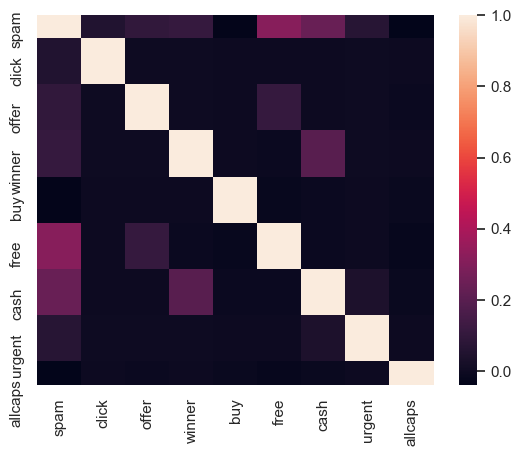

In [5]:
sns.heatmap(sms_raw.corr());

As you can see, most of the words show strong independence from one another with the strongest correlation occuring bettween free:offer and cash:winner.

Before you can run the model you must construct the training data.  SKLearn requires you to specify an outcome ($ y $ or dependent variable) and your inputs ($ x $ independent variables).  They will be added under the titles `data` and `target`.

In [7]:
data = sms_raw[keywords + ["allcaps"]]
target = sms_raw["spam"]

# The data is binary / boolean, so import the Bernoulli classifier, I'd normally add this import at the top but this is for illustration
from sklearn.naive_bayes import BernoulliNB

# Instantiate the model and store it in a new variable
bnb = BernoulliNB()

# Fit the model to the data
bnb.fit(data,target)

# Classify, storing the result in a new variable
y_pred = bnb.predict(data)

# Display the results
print(f"Number of mislabeled points out of a total {data.shape[0]} points: {(target != y_pred).sum()}")

Number of mislabeled points out of a total 5572 points: 604


The names for training other kinds of Naive Bayes can be found in the documentation: http://scikit-learn.org/stable/modules/naive_bayes.html

## Bayesian Poisoning

When implementing Naive Bayes there is an important caveat.  Because Naive Bayes relies on probabilities then these probabilities are ofted based around obvious keywords it is a vulnerable model meaning that the model can be easily manipulated.  This is done through a process called __Bayesian Poisoning__.

In spam, this would be done through including words in the spam message that would be highly unlikely to be part of a spam message.  This would convince the model that the message is legitimate and to let it into your inbox or whatever.